In [2]:
import pandas as pd
import os




# $Y_i=f(\beta_i +\beta_1 x_1)$

# $Y_i\in \{0,1\}$

In [54]:
log_df          = pd.read_csv(os.path.join("data", 'marks.txt'), header=None, names=['test1', 'test2', 'mark'])
log_df["label"] = log_df["mark"].apply(lambda x: "not admitted" if x == 0 else "admitted")


Text(0, 0.5, 'test 2 performance')

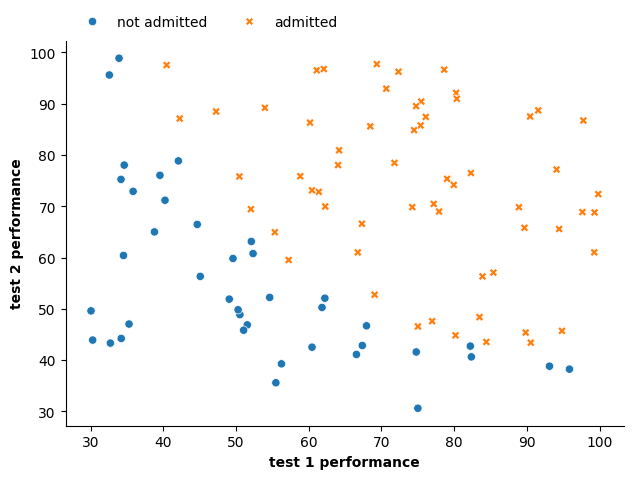

In [59]:
import seaborn as sns
fig, ax = plt.subplots(1,1 , figsize=(7.2, 5))

sns.scatterplot(ax=ax, data=log_df, x="test1", y="test2", style="label", hue="label")

ax.legend(loc='upper left', bbox_to_anchor=(0, 1.1), ncols=2, frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel("test 1 performance", weight='bold')
ax.set_ylabel("test 2 performance", weight='bold')


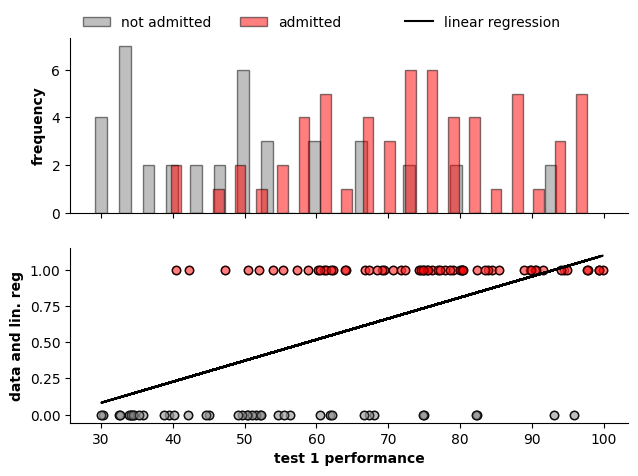

In [50]:

def lin_reg(x, y):
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x, y)
    return model

x = log_df[['test1']]
y = log_df['mark']
model = lin_reg(x, y)
model.coef_, model.intercept_

fig, ax = plt.subplots(2, 1, figsize=(7.2, 5), sharex=True)



zeros_hist = np.histogram( log_df[log_df.mark==0]["test1"], bins=20)
ones_hist  = np.histogram( log_df[log_df.mark==1]["test1"], bins=20)

ax[0].bar(zeros_hist[1][:-1], zeros_hist[0], width=(zeros_hist[1][1]-zeros_hist[1][0])/2, alpha=0.5, label="not admitted", fc="gray", ec="k")
ax[0].bar(ones_hist[1][:-1], ones_hist[0], width=(ones_hist[1][1]-ones_hist[1][0])/2, alpha=0.5, label="admitted", fc="red", ec="k")

ax[1].scatter(log_df.test1, log_df.mark, fc="w", ec="k")
ax[1].plot(x, model.predict(x), color="k", label="linear regression")

ax[1].scatter(log_df[log_df.mark==0].test1, log_df[log_df.mark==0].mark, fc="gray", ec="k", alpha=0.5)
ax[1].scatter(log_df[log_df.mark==1].test1, log_df[log_df.mark==1].mark, fc="red", ec="k", alpha=0.5)

for axi in ax.flatten():
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

ax[-1].set_xlabel("test 1 performance", weight="bold")
ax[1].set_ylabel("data and lin. reg", weight="bold")
ax[0].set_ylabel("frequency", weight="bold")

ax[0].legend(loc="upper left", frameon=False, ncol=2, bbox_to_anchor=(0, 1.2))
ax[1].legend(loc="upper right", frameon=False, bbox_to_anchor=(0.9, 2.4))

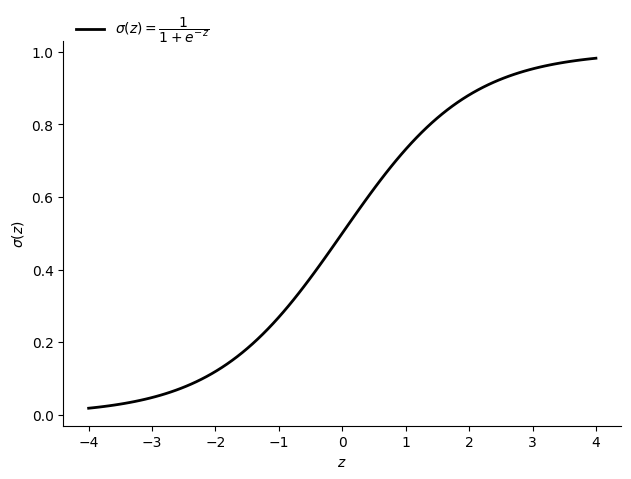

In [68]:
import numpy as np
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x= np.linspace(-4, 4, 100)

fig, ax = plt.subplots(1, 1, figsize=(7.2, 5))
ax.plot(x, sigmoid(x), color="k", lw=2, label=r"$\sigma(z)=\dfrac{1}{1+e^{-z}}$")

ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$\sigma(z)$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(0, 1.1))


# $Y_i\in \{0,1\}$

# $Y_i=f(\beta_i +\beta_1 x_1)$

# $f(z)=\frac{1}{1+\exp\left(-z\right)}$

# $z=\beta_i +\beta_1 x_1$

In [8]:
sigmoid(model.predict(x)) > 0.5

/Users/chaosdonkey06/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[-4.         -3.91919192 -3.83838384 -3.75757576 -3.67676768 -3.5959596
 -3.51515152 -3.43434343 -3.35353535 -3.27272727 -3.19191919 -3.11111111
 -3.03030303 -2.94949495 -2.86868687 -2.78787879 -2.70707071 -2.62626263
 -2.54545455 -2.46464646 -2.38383838 -2.3030303  -2.22222222 -2.14141414
 -2.06060606 -1.97979798 -1.8989899  -1.81818182 -1.73737374 -1.65656566
 -1.57575758 -1.49494949 -1.41414141 -1.33333333 -1.25252525 -1.17171717
 -1.09090909 -1.01010101 -0.92929293 -0.84848485 -0.76767677 -0.68686869
 -0.60606061 -0.52525253 -0.44444444 -0.36363636 -0.28282828 -0.2020202
 -0.12121212 -0.04040404  0.04040404  0.12121212  0.2020202   0.28282828
  0.36363636  0.44444444  0.52525253  0.60606061  0.68686869  0.76767677
  0.84848485  0.92929293  1.01010101  1.09090909  1.17171717  1.25252525
  1.33333333  1.41414141  1.49494949  1.57575758  1.65656566  1.73737374
  1.81818182  1.8989899   1.97979798  2.06060606  2.14141414  2.22222222
  2.3030303   2.38383838  2.46464646  2.54545455  2.62626263  2.70707071
  2.78787879  2.86868687  2.94949495  3.03030303  3.11111111  3.19191919
  3.27272727  3.35353535  3.43434343  3.51515152  3.5959596   3.67676768
  3.75757576  3.83838384  3.91919192  4.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

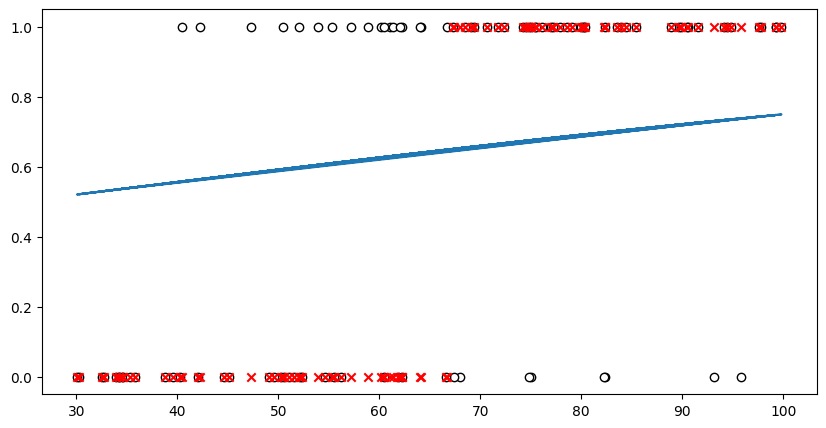

In [29]:
fig, ax = plt.subplots(1,1 , figsize=(10, 5))

ax.scatter(log_df.test1, log_df.mark, label='test1', ec="k", fc="w")
ax.plot(x, sigmoid(model.predict(x)), label='test1')
ax.scatter(x, sigmoid(model.predict(x))>0.65, label='prediction', marker='x', color='r')

# $\sum_i^n \mathbb{I_{y_i=\hat{y_i}}}$

# accuracy=$\sum_i^n \hat{y_i}^{y_i}*(1-\hat{y_i})^{1-y_i}$

# $y_i=\sigma\left(\beta_0+\beta_1x_i\right)$

# $\sigma(z)=\frac{1}{1+\exp\left(-z\right)}$


In [30]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()

y_pred = sigmoid(model.predict(x))>0.65
y_true = log_df.mark
accuracy(y_true, y_pred)


0.74

In [40]:
import scipy.optimize as fmin

X = log_df[['test1', 'test2']]
y = log_df['mark']


def sigmoid(x):
    return 1/(1 + np.exp(-x))

def cost(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost    = (1/m)*(((-y).T @ np.log(h))-((1-y).T @ np.log(1-h)))
    return cost

θ_hat =  fmin.minimize(cost, x0=np.zeros(X.shape[1]), args=(X, y), method='TNC')


In [46]:
X.shape, θ_hat.x.shape

((100, 2), (2,))

In [51]:
def accuracy(X, θ, y_true):
    y_pred = sigmoid(X @ θ) > 0.5
    return (y_true == y_pred).mean()

accuracy(X, θ_hat.x, y)

0.6

<Axes: xlabel='test1', ylabel='test2'>

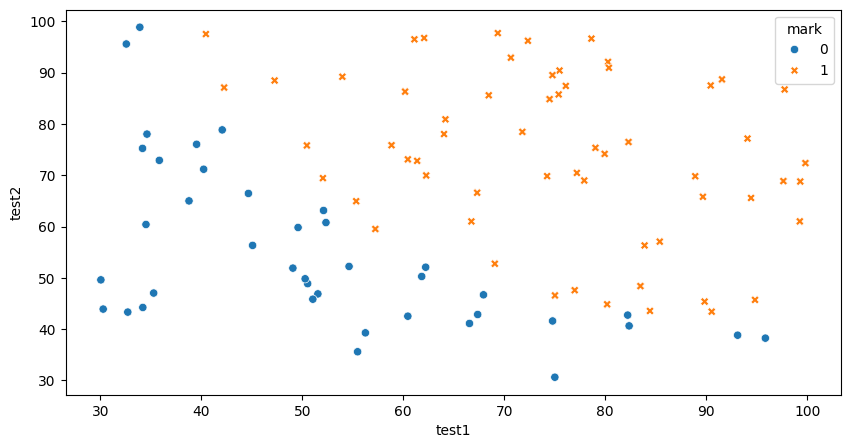

In [42]:

fig, ax = plt.subplots(1,1 , figsize=(10, 5))

sns.scatterplot(data=log_df, x="test1", y="test2", style="mark", hue="mark", ax=ax)